# UNB - PPGI
## Processamento de Imagem

### Trabalho 01 - Parte 2/2

<br>

Henrique Brandão
___


Escolha ou prepare duas imagens monocromáticas, entre 500 e 700 pixels de largura ou altura. As dimensões da imagem tem que ser bem documentadas.  

Quantize cada imagem em 64, 16, 8, 4 e 2 níveis de cinza.  
Repita a quantização mas com difusão de erro, usando pesos de Floyd e Steinberg. 

Mostre cada imagem quantizada com ou sem difusão de erro.  

Repita experimento para uma imagem colorida, ou seja das mesmas dimensões, mas com 3 componentes, R, G, e B. Trate cada componente como uma imagem monocromática e quantize-as com 4 e 2 níveis de cinza, também com e sem difusão de erro usando os mesmo pesos de Floyd e Steinberg. .  

Entrega é um documento em PDF em formato de relatório. Código só em anexo. Não precisa enrolar nem colocar background, mas precisa discutir o que você está fazendo e discutir os resultados.


In [1]:
import cv2

import numpy as np
import seaborn as sns

from PIL import Image
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
DIR_SAIDA = './saida_B/'

In [3]:
f1, f2 = 'img01.jpeg', 'img02.jpg'
i1, i2 = Image.open(f1), Image.open(f2)

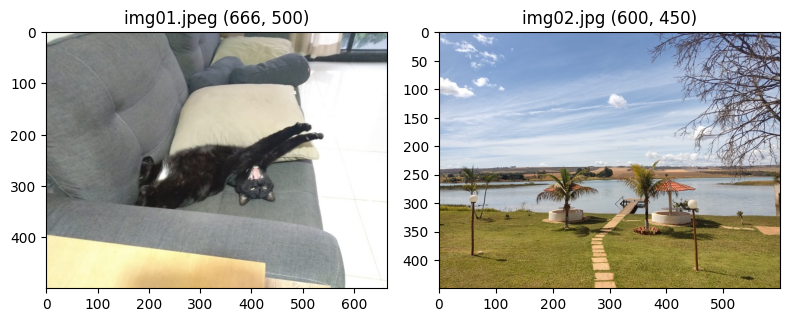

In [4]:
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.title(f'{f1} {i1.size}')
plt.imshow(i1)

plt.subplot(1, 2, 2)
plt.title(f'{f2} {i2.size}')
plt.imshow(i2)

plt.tight_layout()
plt.show()

In [5]:
def processa(fp: str, quant: int):
    imagem = cv2.imread(fp)

    canal_azul, canal_verde, canal_vermelho = cv2.split(imagem)

    niveis_quantizacao = quant

    canal_azul_quantizado = np.uint8(np.floor(canal_azul / 256.0 * niveis_quantizacao) * (256 / niveis_quantizacao))
    canal_verde_quantizado = np.uint8(np.floor(canal_verde / 256.0 * niveis_quantizacao) * (256 / niveis_quantizacao))
    canal_vermelho_quantizado = np.uint8(np.floor(canal_vermelho / 256.0 * niveis_quantizacao) * (256 / niveis_quantizacao))

    imagem_quantizada = cv2.merge((canal_azul_quantizado, canal_verde_quantizado, canal_vermelho_quantizado))

    def apply_dithering(channel, quant):
        h, w = channel.shape
        for y in range(h):
            for x in range(w):
                old_pixel = channel[y, x]
                new_pixel = np.uint8(np.floor(old_pixel / 255.0 * quant) * (255.0 / quant))
                error = old_pixel - new_pixel
                channel[y, x] = new_pixel
                if x < w - 1:
                    channel[y, x + 1] += error * 7 / 16
                if x > 0 and y < h - 1:
                    channel[y + 1, x - 1] += error * 3 / 16
                if y < h - 1:
                    channel[y + 1, x] += error * 5 / 16
                if x < w - 1 and y < h - 1:
                    channel[y + 1, x + 1] += error * 1 / 16
        return channel

    canal_azul_dithered = apply_dithering(canal_azul, quant)
    canal_verde_dithered = apply_dithering(canal_verde, quant)
    canal_vermelho_dithered = apply_dithering(canal_vermelho, quant)

    imagem_dithered = cv2.merge((canal_azul_dithered, canal_verde_dithered, canal_vermelho_dithered))

    return imagem_quantizada, imagem_dithered

___
## Imagem #1

In [6]:
i1q4 = processa(f1, 4)
i1q2 = processa(f1, 2)

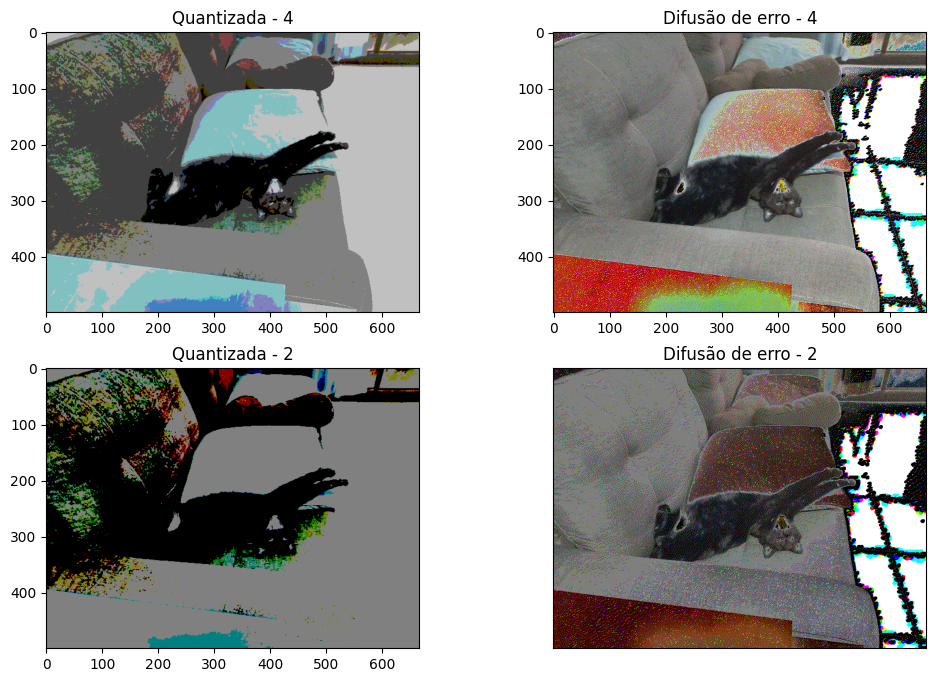

In [7]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Quantizada - 4')
plt.imshow(i1q4[0])

plt.subplot(2,2,2)
plt.title('Difusão de erro - 4')
plt.imshow(i1q4[1])

plt.subplot(2,2,3)
plt.title('Quantizada - 2')
plt.imshow(i1q2[0])

plt.subplot(2,2,4)
plt.title('Difusão de erro - 2')
plt.imshow(i1q2[1])

plt.xticks([])
plt.yticks([])
plt.show()

___
## Imagem #2

In [8]:
i2q4 = processa(f2, 4)
i2q2 = processa(f2, 2)

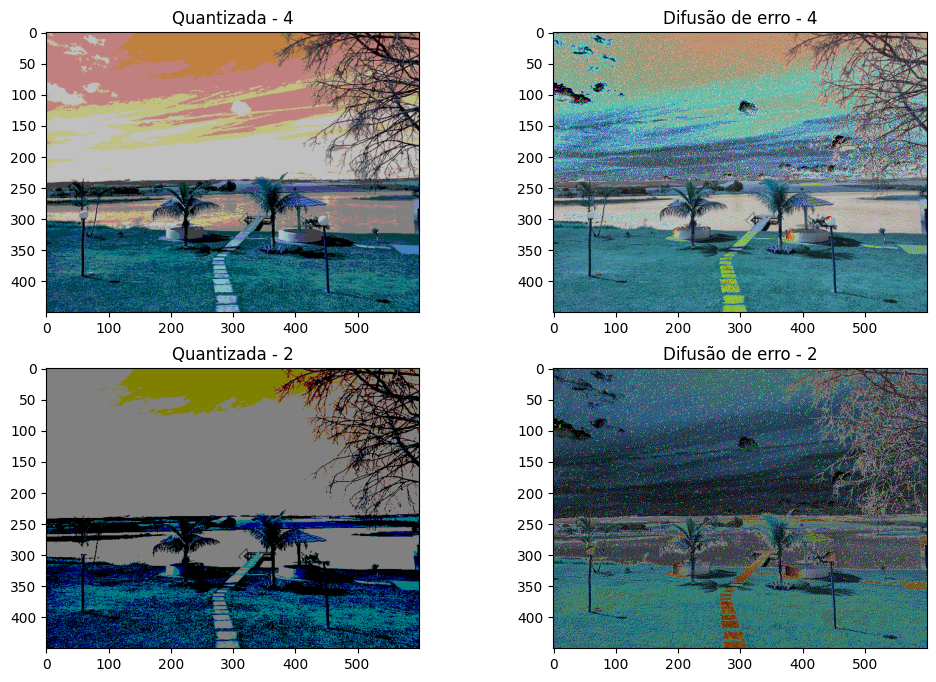

In [9]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.title('Quantizada - 4')
plt.imshow(i2q4[0])

plt.subplot(2,2,2)
plt.title('Difusão de erro - 4')
plt.imshow(i2q4[1])

plt.subplot(2,2,3)
plt.title('Quantizada - 2')
plt.imshow(i2q2[0])

plt.subplot(2,2,4)
plt.title('Difusão de erro - 2')
plt.imshow(i2q2[1])

plt.show()

___
### Salvar imagens

In [10]:
def salvar_lote(fn: str, lote: list, dir_saida='saida_B'):
    __ = tuple(zip((4, 2), lote))
    for q,img in __:
        Image.fromarray(img[0]).save(f'{dir_saida}/{fn}-{q}.png')
        Image.fromarray(img[1]).save(f'{dir_saida}/{fn}-{q}-dither.png')

In [11]:
salvar_lote('i1', [i1q4, i1q2])

In [12]:
salvar_lote('i2', [i2q4, i2q2])